In [15]:
'''

读进evoked，进行组平均

一对一对先看一下。看下是否有明显差异波，然后再相减，统计。

'''

import os.path as op
import mne
from mne.preprocessing import ICA
from mne.event import define_target_events
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import os
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
from mne.channels import combine_channels

# DD
sub_ids = [

     "pre4002_y","pre4004_y","pre4004_y","pre4005_y","pre4010_y","pre4012_y","pre4013_y"

]
# 正常儿童
sub_ids = [

     "pre4003_y","pre4007_y","pre4008_y","pre4009_y","pre4011_y","pre4012_y","pre4013_y"

]


In [16]:
data_path = 'E:\实验\阅读困难\数据处理\pre4\data\\7evoked_equalization_oddball\\'
type_stim = ['std_BA','odd_TA','std_ta','odd_ba','std_t1ji','odd_t4ji','std_t4ji','odd_t1ji']
list_evoked_std_BA = list()
list_evoked_odd_TA = list()
list_evoked_std_ta = list()
list_evoked_odd_ba = list()
# sub_id = sub_ids[1]
for sub_id in sub_ids:
    num_type =3
    #区别仅仅是这里换一下名称
    fname = data_path + sub_id + '_'+ 'std_t1ji' +'-ave.fif'
    evoked1 = mne.read_evokeds(fname)[0]
    evoked1.filter(l_freq=0.3, h_freq=30)
    list_evoked_std_BA.append(evoked1)

    num_type =4
    fname = data_path + sub_id + '_'+'odd_t4ji'+'-ave.fif'
    evoked2 = mne.read_evokeds(fname)[0]
    evoked2.filter(l_freq=0.3, h_freq=30)
    list_evoked_odd_TA.append(evoked2)

    # num_type = 7
    # fname = data_path + sub_id + '_'+'std_t4ji'+'-ave.fif'
    # evoked3 = mne.read_evokeds(fname)[0]
    # evoked3.filter(l_freq=0.3, h_freq=30)
    # list_evoked_std_ta.append(evoked3)
    #
    # num_type = 8
    # fname = data_path + sub_id + '_'+'odd_t1ji'+'-ave.fif'
    # evoked4 = mne.read_evokeds(fname)[0]
    # evoked4.filter(l_freq=0.3, h_freq=30)
    # list_evoked_odd_ba.append(evoked4)

list_evoked_std = list_evoked_std_BA+list_evoked_std_ta
list_evoked_odd = list_evoked_odd_TA+list_evoked_odd_ba

grand_average_std = mne.grand_average(list_evoked_std)
grand_average_odd = mne.grand_average(list_evoked_odd)
grand_average_std.comment = 'STD'
grand_average_odd.comment = 'ODD'
grand_average_all = list()
grand_average_all = [grand_average_std,grand_average_odd]



Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4003_y_std_t1ji-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (3)
        0 CTF compensation matrices available
        nave = 46 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 11001 samples (11.001 sec)

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4003_

C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:13: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked1.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:19: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked2.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=

No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 11001 samples (11.001 sec)

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4007_y_odd_t4ji-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (4)
        0 CTF compensation matrices available
        nave = 45 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:13: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked1.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    0.0s finished
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:19: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked2.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=

Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 11001 samples (11.001 sec)

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4008_y_odd_t4ji-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (4)
        0 CTF compensation matrices available
        nave = 42 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---

C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:13: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked1.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:19: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked2.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4009_y_odd_t4ji-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (4)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 11001 samples (11.001 sec)

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4011_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:19: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked2.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 o

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4011_y_odd_t4ji-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (4)
        0 CTF compensation matrices available
        nave = 43 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 11001 samples (11.001 sec)

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4012_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:19: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked2.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 o

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4012_y_odd_t4ji-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (4)
        0 CTF compensation matrices available
        nave = 36 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 11001 samples (11.001 sec)

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4013_

[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:19: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked2.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:13: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a lo

Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4013_y_odd_t4ji-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (4)
        0 CTF compensation matrices available
        nave = 27 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Setting up band-pass filter from 0.3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 11001 samples (11.001 sec)

Identifying common channels ...
Dropped the following channels:
['M1']


C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\1369038802.py:19: RuntimeWarning: filter_length (11001) is longer than the signal (1501), distortion is likely. Reduce filter length or filter a longer signal.
  evoked2.filter(l_freq=0.3, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished


In [17]:
'''
兴趣区
frontal–central electrodes (F3, F4, FCz, FC3, and FC4)
'''
%matplotlib qt
groups=dict(Left=[7, 11, 18, 16, 20], )
roi_evoked_std = combine_channels(grand_average_std, groups=groups)
roi_evoked_odd = combine_channels(grand_average_odd, groups=groups)

#造一个差异波Evoked
roi_evoked_oddvsstd = roi_evoked_odd.copy()
roi_evoked_oddvsstd.data = roi_evoked_oddvsstd.data-roi_evoked_std.data

ROI_grand_average_all = [roi_evoked_std,roi_evoked_odd,roi_evoked_oddvsstd]
from mne.viz import plot_evoked_topo, plot_compare_evokeds

plot_compare_evokeds(ROI_grand_average_all)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_9996\3018721010.py:17: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  plot_compare_evokeds(ROI_grand_average_all)


[<Figure size 800x600 with 1 Axes>]

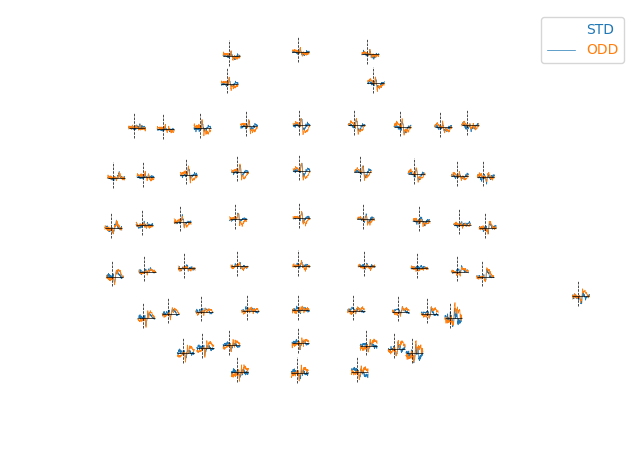

In [18]:
%matplotlib qt

title = 'MNE sample data\nleft vs right (A/V combined)'
from mne.viz import plot_evoked_topo
plot_evoked_topo(grand_average_all, legend=True)


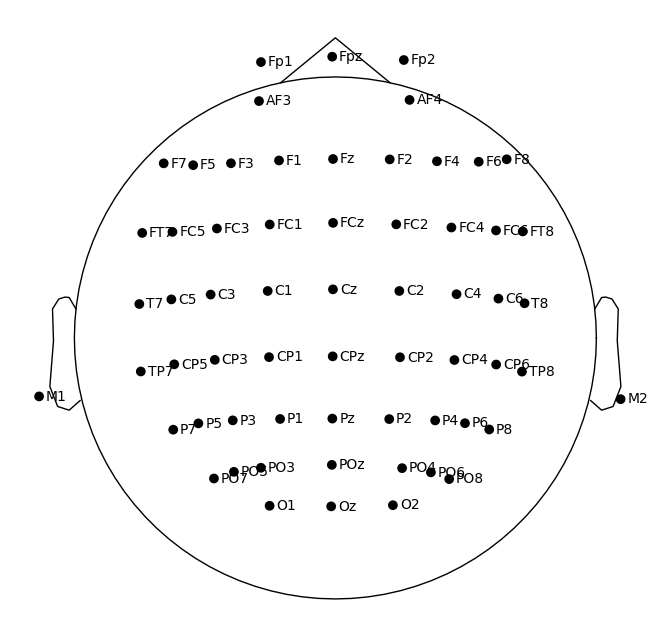

In [19]:
evoked2.plot_sensors(show_names=True)

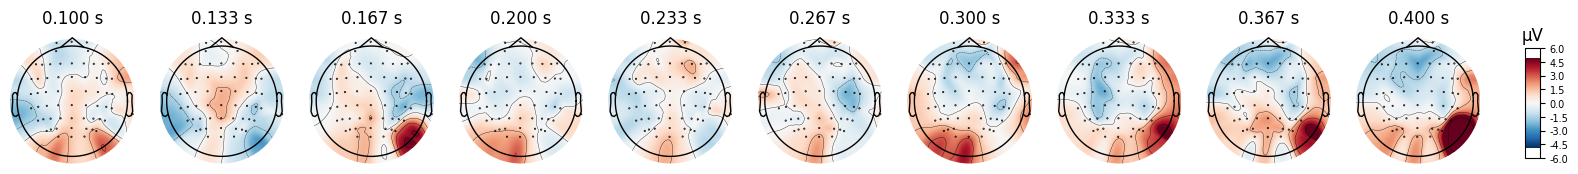

In [20]:

times = np.linspace(0.1, 0.4, 10)
grand_average_odd_std = grand_average_std
data_grand_average_odd_std = grand_average_odd.data - grand_average_std.data
grand_average_odd_std.data = data_grand_average_odd_std
grand_average_odd_std.plot_topomap(ch_type='eeg', times=times, colorbar=True)

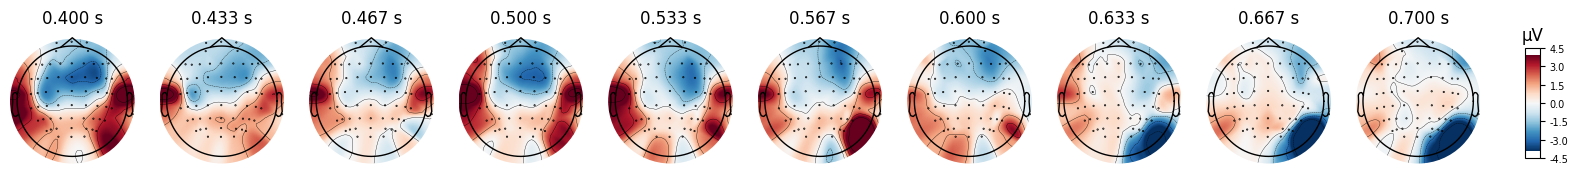

In [21]:
times = np.linspace(0.4, 0.7, 10)
grand_average_odd_std = grand_average_std
data_grand_average_odd_std = grand_average_odd.data - grand_average_std.data
grand_average_odd_std.data = data_grand_average_odd_std
grand_average_odd_std.plot_topomap(ch_type='eeg', times=times, colorbar=True)